In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [185]:
data=pd.read_csv(r"C:\Users\ayazl\bank-full.csv")
data.head()
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

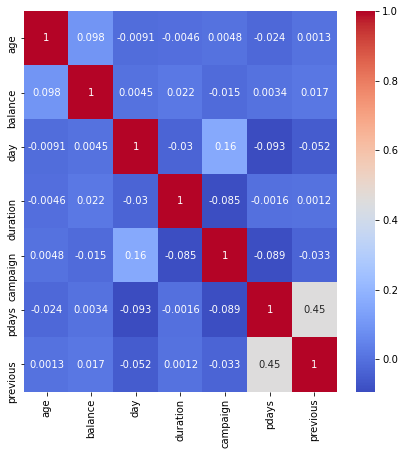

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [186]:
a<-data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(a,cmap='coolwarm',annot=True)
plt.show()
data.head()


<Figure size 1440x1440 with 0 Axes>

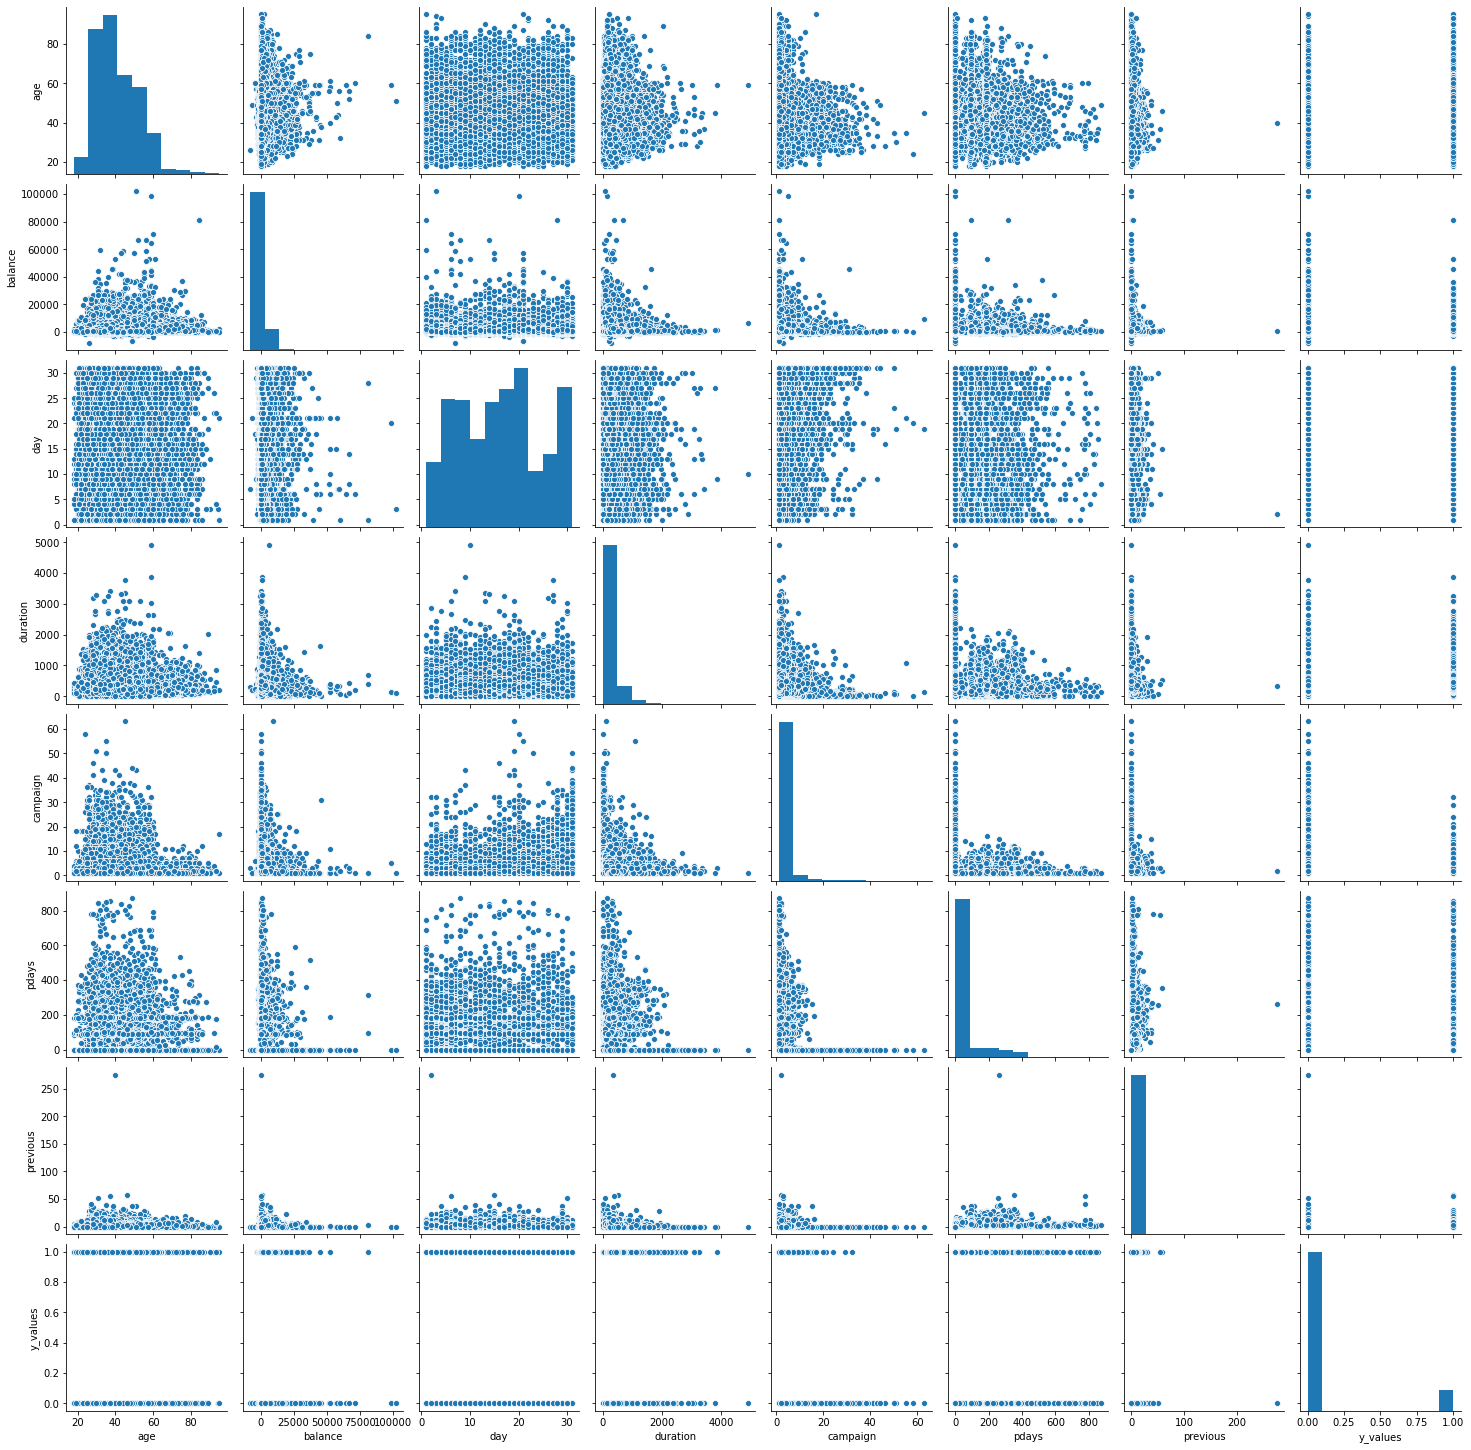

In [196]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

In [187]:
data['y_values']=pd.factorize(data.y)[0]
data.y_values.value_counts()
#convert categorical variables to values and then plot count the values, here 0 is for no and 1 is for yes.

0    39922
1     5289
Name: y_values, dtype: int64

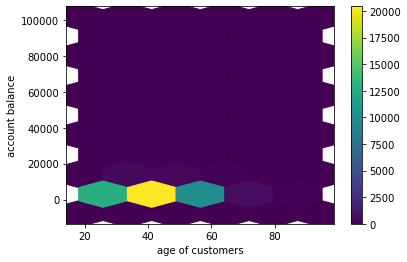

In [188]:
#using hexbin between two explanatory variables
plt.hexbin(x=data['age'],y=data['balance'],gridsize=(5,5))
plt.colorbar()
plt.xlabel('age of customers')
plt.ylabel('account balance')
plt.show()

In [189]:
M=data.balance.quantile(0.90)
m=data.balance.quantile(0.10)
print(M,m)
g=data[(data['balance']<M ) & (data['balance']>m)]

3574.0 0.0


In [190]:
#contigency table for each pair of categorical data.
marital_ctable=pd.crosstab(data['marital'],data['y'],normalize=True,margins=True)
job_ctable=pd.crosstab([data['job']],[data['y']],normalize=True,margins=True)
default_ctable=pd.crosstab(data['default'],data['y'],normalize=True,margins=True)
education_ctable=pd.crosstab(data['education'],data['y'],normalize=True,margins=True)
housing_ctable=pd.crosstab(data['housing'],data['y'],normalize=True,margins=True)
loan_ctable=pd.crosstab(data['loan'],data['y'],normalize=True,margins=True)
previous_ctable=pd.crosstab(data['previous'],data['y'],normalize=True,margins=True)
poutcome_ctable=pd.crosstab(data['poutcome'],data['y'],normalize=True,margins=True)
#print(marital_ctable)
#print(job_ctable)
#print(default_ctable)
#print(education_ctable)
print(housing_ctable)
#print(loan_ctable)
#print(previous_ctable)
#print(poutcome_ctable)


y              no       yes       All
housing                              
no       0.369976  0.074185  0.444162
yes      0.513039  0.042799  0.555838
All      0.883015  0.116985  1.000000


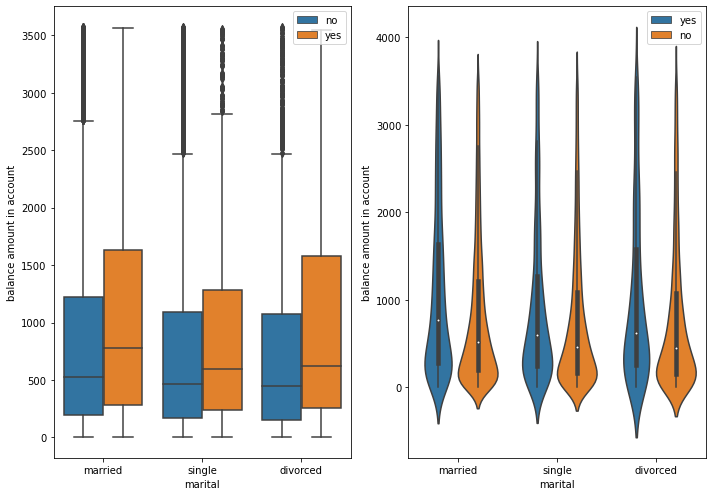

In [123]:
#plotting violin plots and box plots for non-categorical data i.e. balance and grouping it by marital status.
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(x=g['marital'],y=g['balance'],hue=g['y'])
plt.ylabel('balance amount in account')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
sns.violinplot(x=g['marital'],y=g['balance'],hue=g['y'],hue_order=['yes','no'])
plt.ylabel('balance amount in account')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

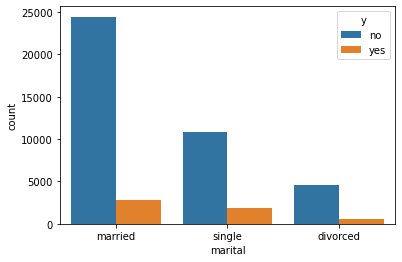

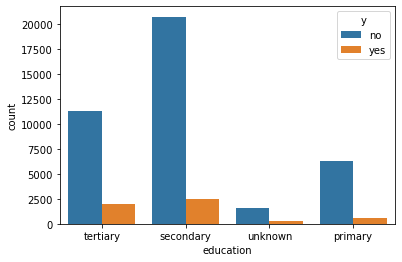

In [175]:
#countplot for finding the number of people from each category that will buy term deposit
sns.countplot(data['marital'],hue=data['y'])
plt.show()
sns.countplot(data['education'],hue=data['y'])
plt.show()
sns.countplot(data[''],hue=data['y'])
plt.show()
#marital categorical variable

In [191]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

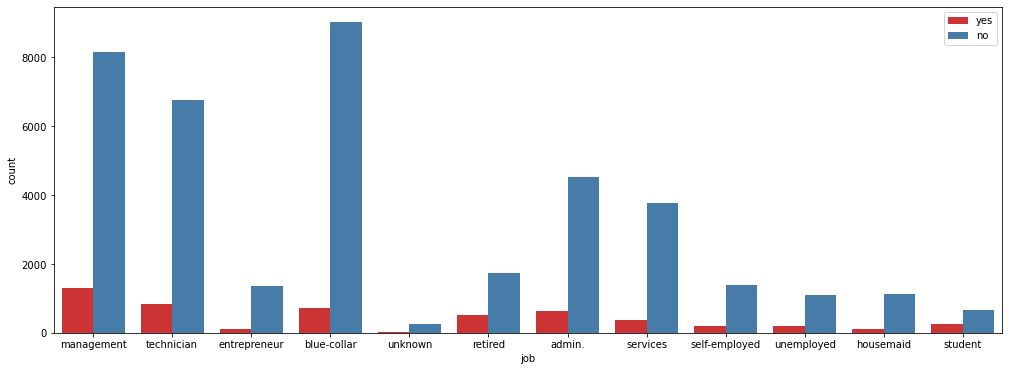

In [192]:
#countplot for jobs
plt.figure(figsize=(17,6))
sns.countplot(data['job'],hue=data['y'],hue_order=['yes','no'],palette='Set1')
plt.legend(loc='upper right')
plt.xlabel('job')
plt.show()


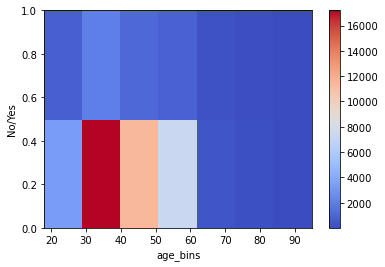

In [201]:
#2d histogram to vusualise 
plt.hist2d(x=data['age'],y=data['y_values'],bins=(7,2),cmap='coolwarm')
plt.xlabel('age_bins')
plt.ylabel('No/Yes')
plt.colorbar()
plt.show()

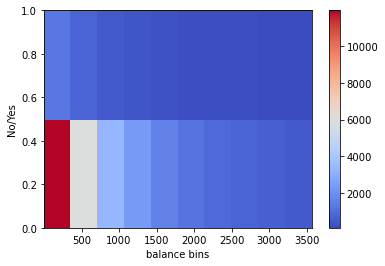

In [200]:
plt.hist2d(x=g['balance'],y=g['y_values'],bins=(10,2),cmap='coolwarm')
plt.colorbar()
plt.xlabel('balance bins')
plt.ylabel('No/Yes')
plt.show()

In [157]:
MAX=data.campaign.quantile(0.90)
MIN=data.campaign.quantile(0.10)
f=data[(data['campaign']<MAX)&(data['campaign']>MIN)]

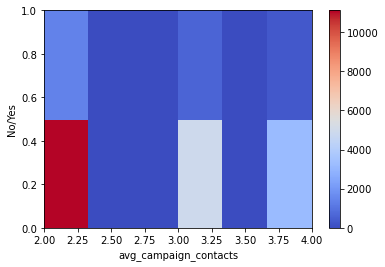

In [199]:
plt.hist2d(x=f['campaign'],y=f['y_values'],bins=(6,2),cmap='coolwarm')
plt.xlabel('avg_campaign_contacts')
plt.ylabel('No/Yes')
plt.colorbar()
plt.show()